In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [15]:
#load iris dataset
iris = pd.read_csv('iris.csv')
display(iris)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
#get the number of classes in the iris dataset
number_class = np.unique(iris['class'])
print(number_class)
print(len(number_class))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
3


In [17]:
#define the variables that will be passed to the model
variables = iris.iloc[:,0:4]
class_ = iris.iloc[:,4]

In [18]:
# creating a grouping model using the different classes as clusters 
cluster = KMeans(n_clusters = 3)
cluster.fit(variables)

c:\Users\willi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [19]:
#visualization of the centroids of the groups
centroids = cluster.cluster_centers_
print(centroids)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [20]:
#classification of the model
predictions = cluster.labels_
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [21]:
#encode the actual class names
labelencoder = LabelEncoder()
class_ = labelencoder.fit_transform(class_)
display(class_)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
#Generate a confusion matrix from the predictions and actual values
results = confusion_matrix(class_, predictions)
ACC = accuracy_score(class_, predictions)
print(results)
print(f"Accuracy: {ACC*100:.2f} %")

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
Accuracy: 89.33 %


In [23]:
#summary of the results
df = pd.DataFrame(variables)
df['class'] = class_
df['predictions'] = predictions
display(df)

,sepal length,sepal width,petal length,petal width,class,predictions
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


Text(0.5, 0, 'Sepal length (cm)')

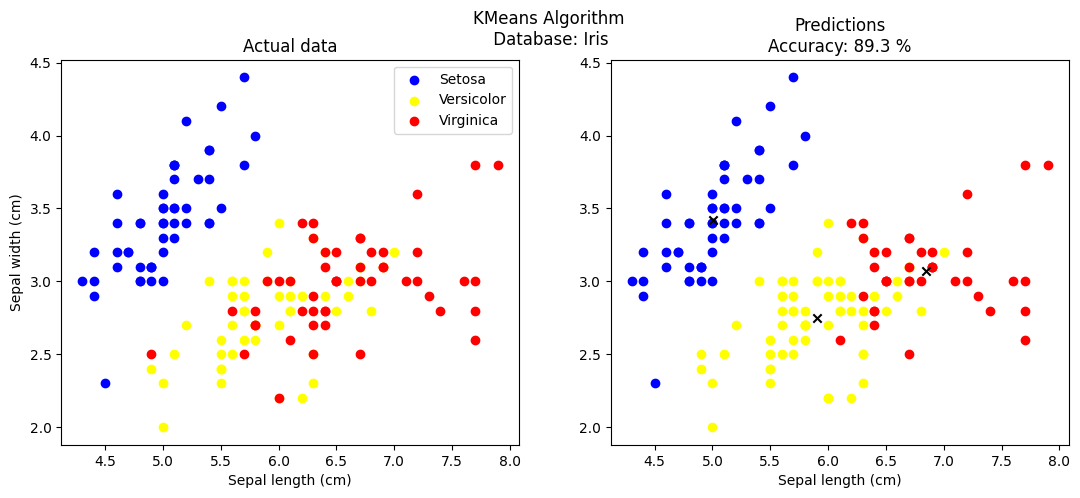

In [25]:
#Create some graphs to display the results

f = plt.figure(0, figsize=(13,5))
plt.suptitle('KMeans Algorithm\n Database: Iris')
f.add_subplot(1,2,1)
plt.title('Actual data') 
plt.scatter(df['sepal length'][class_ == 0], df['sepal width'][class_ == 0], 
            c = 'blue', label = 'Setosa')
plt.scatter(df['sepal length'][class_ == 1], df['sepal width'][class_ == 1], 
            c = 'yellow', label = 'Versicolor')
plt.scatter(df['sepal length'][class_ == 2], df['sepal width'][class_ == 2], 
            c = 'red', label = 'Virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(frameon = True, loc = 'best')


f.add_subplot(1,2,2)
plt.title('Predictions\n' + f"Accuracy: {ACC*100:.1f} %")
plt.scatter(df['sepal length'][predictions == 0], df['sepal width'][predictions == 0], 
            c = 'blue', label = 'Setosa')
plt.scatter(centroids[0][0], centroids[0][1], c = 'black', marker = 'x')
plt.scatter(df['sepal length'][predictions == 1], df['sepal width'][predictions == 1], 
            c = 'yellow', label = 'Versicolor')
plt.scatter(centroids[1][0], centroids[1][1], c = 'black',  marker = 'x')
plt.scatter(df['sepal length'][predictions == 2], df['sepal width'][predictions == 2], 
            c = 'red', label = 'Virginica')
plt.scatter(centroids[2][0], centroids[2][1], c = 'black', marker = 'x')
plt.xlabel('Sepal length (cm)')
